# Introduction

### Motivation

My main question for this project is:
> _Has LSE been improving teaching quality in the department of Economics and across the university as a whole?_

This is an important question to consider both for LSE and prospective undergraduates. For students, good teaching quality is important for them to be able to make the most of their time at university and reap the most benefits. For LSE, it is important to know whether relevant resources are going into improving or at the very least mainting its teaching quality versus other universities so that it holds a respectable position worldwide when it comes to teaching social sciences. 

### Goal of the study
The **GOAL** of this study is to:  
> _Discover underlying trends in data that quantifies LSE's teaching quality and how effectively they have been improving this._

# Data Acquisition

For the purpose of this study, we first need to determine what data can help represent teaching quality as it can be measured through a variety of different metrics. The first most obvious one is LSE's rank as an institution amongst other universities as when ranking the position of a university, teaching is an important characteristic of a universities overall ranking. 

Furthermore, student reviews are also another important source of finding out teaching quality as the overall rating specific to the course and lecturers are important. This also ties into student satisfaction for the course as opposed to university ranking websites which may consider other factors except teaching as students likely place a greater emphasis on teaching quality and therefore have a more representative view of LSE's teaching. 


With this in mind, we will have 4 data sources, LSE's historical ranking overall as a university as per QS Rankings, The Complete University Guide LSE rankings for Economics, the National Student Survey and finally independent student reviews on websites regarding all courses overall.

1. **LSE University Ranking: QS**  
QS World Rankings have 6 main criteria each of which are given the respective weighting, Academic Reputation (40%), Employer Reputation (10%), Faculty/Student Ratio (20%), Citations per faculty (20%), International Faculty Ratio (5%), International Student Ratio (5%). While this ranking is more wholistic, it does place a strong emphasis on academic reputation which is reflective of teaching quality and standards. However, it is unclear what value is used to quantify things such as the Academic Reputation and Employer Reputation. The rank is an integer that is calculated by them and given to each university listed on the website.  
  
  
2. **LSE Economics Ranking + SS: Complete University Guide**. 
The Complete University Guide website compiles data from public sources such as Office for Students (OfS) for England, Scottish Funding Council (SFC), Higher Education Funding Council for Wales (HEFCW) and The Department for the Economy in Northern Ireland. Through this, they form their own metrics of ranking universities against other universities. For this study, we will only use student satisfaction and rank for BSc Economics at LSE. The rank is an integer number determined from a score a university gets based on data compiled from the previously mentioned sources and student satisfaction is a positive real number from 0 to 5 with 5 being the highest score a university course can get which is obtained from the NSS specifically regarding questions with course satisfaction and teaching.
  

3. **LSE Student Reviews: WhatUni.com**
What Uni is a website in which students can independently leave reviews about a university and rate the different aspects such as teaching, employment opportunities and societies. The score is given out of 5. For this study, we will be using this website to extract the rating for teaching and lecturers. This will be a primary source of information as it will allow us to identify how students across all departments at LSE rate teaching and how this has evolved over the years.
  

4. **LSE Student Surveys: NSS Data**  
The National Student Survey (NSS) is an annual survey managed by the Office of Students (UK) of final year students at university on a variety of aspects of their university experience. Nearly half a million students do this survey annually and are asked 27 single choice questions. The response given for questions can be definitely disagree, mostly disagree, neither agree nor disagree, mostly agree, definitely agree which are given the values 1, 2, 3, 4 and 5 respectively. For each question, the percentage that agree is then calculated which is the total number of mostly agree and definitely agree responses divided by the total number of responses for the question. 

#### The data can be partitioned into the following categories for the purpose of analysing teaching quality:
- LSE Economics: Complete University Guide, NSS Data
- LSE as a whole: WhatUni, NSS Data, QS Rankings

### Webscraping QS Rankings

QS Historical Ranking data for LSE was collected from the following URL on the 15th of April 2022. It was scraped from the following [link](https://www.topuniversities.com/universities/london-school-economics-political-science-lse).

The data will be saved as a .csv file of the same name as the dataframe created and read into this jupyter notebook for later analysis.

In [132]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#Webscraping historical ranking data from QS rankings
url = 'https://www.topuniversities.com/universities/london-school-economics-political-science-lse'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml') 

ranks = soup.find_all('div', attrs = {'class' : "d-rank-res"})

qs = pd.DataFrame()

for i in range(len(ranks)):
    qs.loc[i, 'Year'] = ranks[i].find_previous('li').text.split()[0]
    qs.loc[i, 'Ranking'] = ranks[i].find_previous('li').text.split()[1][-2:]

### Webscraping WhatUni.com LSE Reviews

Data from WhatUni.com was collected on the 20th April 2022 from the following [link](https://www.whatuni.com/university-course-reviews/london-school-of-economics-and-political-science-university-of-london/5884)

The scraped data has been since saved as .csv from that date, if the code does not run or the scraped data is different, it is due to changes in html code of the website which happened once during the data collection process forcing me to re-scrape the data with different tags to find the necessary data.

In [134]:
#Webscraping student reviews for course and lecturers ranking to get an idea of overall teaching quality

dates = []
score = []

#the formatting of the score is different for 2022, so there is a for loop to address for this in the function below
def review_scores(page):
    url1 = f'https://www.whatuni.com/university-course-reviews/london-school-of-economics-and-political-science-university-of-london/5884/?pageno={page}'
    r1 = requests.get(url1)
    soup1 = BeautifulSoup(r1.content, 'lxml')
    reviews = soup1.find_all('div', attrs = {'class' : "rlst_row"})
    for i in range(len(reviews)):
        date = reviews[i].find('div', attrs = {'class' : "rev_dte"}).text[-2:]
        if int(date) <= 21:
            dates.append(date)
            score.append(reviews[i].find('span', attrs = {'class':"cat_rat rw_qus_des"}, string = 'Lecturers and teaching quality').find_next('span')['class'][-1][-1])
        else:
            dates.append(date)
            score.append(reviews[0].find('div', attrs = {'class':"ext_fac_cntr mt16"}).find_next('div').find_next('div').find_next('div').text[-3])
        pass


#there are 62 pages, so we will run the function on all 62 pages of reviews
for i in range(1, 63):
    review_scores(i)

what_uni_scores = pd.DataFrame({'Year': dates, 'Rating': score})

### Reading Complete University Guide Rankings

The .csv file for Complete University Guide Rankings for Economics at LSE was downloaded from the following [link](https://www.thecompleteuniversityguide.co.uk/league-tables/rankings/economics) on April 14th 2022. It is read into the notebook in the data preparation section

### Reading NSS Data from 2012 - 2021

NSS Data was downloaded from the NSS archive from the following link on the 18th April from the following [link](https://www.officeforstudents.org.uk/advice-and-guidance/student-information-and-data/national-student-survey-nss/nss-data-provider-level/). The data was only downloaded from 2012 to 2021 (the latest available at the time of download) as through briefly going over the data range of the previous sources, 2012 seemed like a good starting year which the other datasets had values from as well.  

We will only be using Q1 and Q2 from the NSS as the NSS survey changed in 2017 as these questions have remained the same since 2005 despite the NSS survey questions change in 2017. They are part of the first 4 questions that relate to the teaching quality of the course and are as follows:

**Q1
: Staff are good at explaining things**

**Q2
: Staff have made the subject interesting**  

**IMPORTANT**: The size of the excel files made it so that pandas takes a long time to find the desired rows and the code below can take 4-5 minutes to completely finish, therefore for convenience they have been saved as .csv files in the Data folder.

In [95]:
#extracting NSS data on question 1 and 2 for LSE as a whole and the economics course 

##q1 and 2 data for LSE as a whole
years = []
for i in range(12, 22):
    years.append(str(i))
    
    
excel_names = [f'NSS_{year}.xlsx' for year in years]

q1_survey = None
q2_survey = None

     
for file in excel_names:
    if int(file[4:6]) > 17:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Provider'] == 'The London School of Economics and Political Science') & (nss['Question Number'] == 'Q01')]
        q1_survey = pd.concat([q1_survey, score], axis=0)
    else:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Institution'].isin(['The London School of Economics and Political Science', 'London School of Economics and Political Science '])) & (nss['Question Number'].isin(['Q01', 'Q01 ']))]
        if q1_survey is None:
            q1_survey = score 
        else:
            q1_survey = pd.concat([q1_survey, score], axis=0)
            
        

for file in excel_names:
    if int(file[4:6]) > 17:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Provider'] == 'The London School of Economics and Political Science') & (nss['Question Number'] == 'Q02')]
        q2_survey = pd.concat([q2_survey, score], axis=0)
    else:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Institution'].isin(['The London School of Economics and Political Science', 'London School of Economics and Political Science '])) & (nss['Question Number'].isin(['Q02', 'Q02 ']))]
        if q2_survey is None:
            q2_survey = score 
        else:
            q2_survey = pd.concat([q2_survey, score], axis=0)
            

lse_q1 = q1_survey[['Year', 'Answered 1','Answered 2', 'Answered 3', 'Answered 4', 'Answered 5',  'Actual value', 'Response']]
lse_q1.reset_index(drop = True, inplace = True)
lse_q2 = q2_survey[['Year', 'Answered 1','Answered 2', 'Answered 3', 'Answered 4', 'Answered 5',  'Actual value', 'Response']]
lse_q2.reset_index(drop = True, inplace = True)

##q1 and q2 for economics at LSE

econ_q1_survey = None
econ_q2_survey = None

 
for file in excel_names:
    if int(file[4:6]) > 17:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS2', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Provider'] == 'The London School of Economics and Political Science') & (
            nss['Question Number'] == 'Q01') & (nss['Subject'] == 'Economics')]
        econ_q1_survey = pd.concat([econ_q1_survey, score], axis=0)
    else:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS2', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Institution'].isin([
            'The London School of Economics and Political Science', 'London School of Economics and Political Science ']
        )) & (nss['Question Number'].isin(['Q01', 'Q01 ']) & (
            nss['Subject'].isin(['(19) Economics', '(19) Economics '])))]
        if econ_q1_survey is None:
            econ_q1_survey = score 
        else:
            econ_q1_survey = pd.concat([econ_q1_survey, score], axis=0)
               
        
for file in excel_names:
    if int(file[4:6]) > 17:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS2', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Provider'] == 'The London School of Economics and Political Science') & (
            nss['Question Number'] == 'Q02') & (nss['Subject'] == 'Economics')]
        econ_q2_survey = pd.concat([econ_q2_survey, score], axis=0)
    else:
        nss = pd.read_excel('Data/' + file, sheet_name = 'NSS2', skiprows = 3)
        nss['Year'] = int('20' + file[4:6])
        score = nss[(nss['Institution'].isin([
            'The London School of Economics and Political Science', 'London School of Economics and Political Science ']
        )) & (nss['Question Number'].isin(['Q02', 'Q02 ']) & (
            nss['Subject'].isin(['(19) Economics', '(19) Economics '])))]
        if econ_q2_survey is None:
            econ_q2_survey = score 
        else:
            econ_q2_survey = pd.concat([econ_q2_survey, score], axis=0)
            
lse_econ_q1 = econ_q1_survey[['Year', 'Answered 1','Answered 2', 'Answered 3', 'Answered 4', 'Answered 5',  'Actual value', 'Response']]
lse_econ_q1.reset_index(drop = True, inplace = True)
lse_econ_q2 = econ_q2_survey[['Year', 'Answered 1','Answered 2', 'Answered 3', 'Answered 4', 'Answered 5',  'Actual value', 'Response']]
lse_econ_q2.reset_index(drop = True, inplace = True)

### Notes: 

Webscraping of university ranking websites proved to be difficult as many of them have interactive pages that make webscrabing beyond the scope of the ST115 course and many also have devices set in place to prevent the use of bots to webscrape. As a result, I was only able to use reviews and rankings from websites such as WhatUni.com that had minimal interactive features which excluded a large number of websites and made it difficult to collect appropriate sized samples for each year. Moreover for reviews on whatuni.com, while some were specific to the course, a large number of reviews had no course label attached and given the already lacking sample sizes for some of the years, it was difficult to only find opinions about the department of Economics. 


# Data Preperation

For this stage of the project, I will independently clean each data set and then combine the ranks in a dataframe called "all_ranks" from the dates 2012 - 2021. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#data cleaning QS ranks
qs = pd.read_csv('Data/qs.csv', index_col = 0)
qs.loc[len(qs.index)] = [2013, np.nan]

qs['Year'] = qs['Year'].astype('int', errors = 'ignore')

qs.sort_values("Year", ascending = True, inplace = True)
qs.reset_index(drop = True, inplace = True)

#for missing 2013 value, decided forward fill was the most sensible given the change of 1 position from 2012-2014
qs['Ranking'].fillna(method = 'ffill', inplace = True)
qs['Ranking'] = qs['Ranking'].astype('int', errors = 'ignore')
qs

,Year,Ranking
0,2012,69
1,2013,69
2,2014,68
3,2015,71
4,2016,35
5,2017,37
6,2018,35
7,2019,38
8,2020,44
9,2021,49


In [3]:
#reading data from complete university guide rankings for studying economics at LSE

cug_ranks = pd.read_csv('Data/Complete_University_Guide_Economics.csv', skiprows = 4)

cur = cug_ranks[cug_ranks['Institution'] == 'London School of Economics'][['Year', 'Rank', 'Student Satisfaction']]

#getting data from 2012 onwards for CUG ranking of Economics at LSE

cur = cur[cur['Year'] >= 2012]
cur.reset_index(inplace = True, drop = True)

cur

,Year,Rank,Student Satisfaction
0,2012,3,3.82
1,2013,1,3.98
2,2014,2,3.83
3,2015,2,3.97
4,2016,4,3.91
5,2017,5,3.85
6,2018,6,3.65
7,2019,5,3.58
8,2020,5,3.57
9,2021,5,3.74


In [4]:
#whatuni data preperation 
what_uni_scores = pd.read_csv('Data/what_uni_scores.csv')
del what_uni_scores[what_uni_scores.columns[0]]
what_uni_scores['Year'] = 2000 + what_uni_scores['Year']

#creating dataframes to see distribution of ratings as well as mean rating per year
pivoted_freq = what_uni_scores.pivot_table(index = 'Year', columns = 'Rating', aggfunc = len)
pivoted_freq.drop(labels = 2013, inplace = True)

mean_year = what_uni_scores.groupby('Year').mean()
mean_year.drop(labels = [2013, 2016], inplace = True)
mean_year.reset_index(inplace = True)


pivoted_freq = pivoted_freq.fillna(0)
pivoted_perc = pivoted_freq.copy()

for i in range(len(pivoted_freq.index)):
    pivoted_perc.iloc[i] = pivoted_perc.iloc[i]/pivoted_perc.iloc[i].sum()*100

In [23]:
mean_year

,Year,Rating
0,2014,3.181818
1,2015,4.020833
2,2017,3.785185
3,2018,4.076087
4,2020,4.148936
5,2021,3.800000
6,2022,3.835165


In [24]:
pivoted_freq

Rating,1,2,3,4,5
Year,,,,,
2014,4.0,5.0,18.0,13.0,4.0
2015,1.0,5.0,12.0,51.0,27.0
2016,1.0,1.0,1.0,1.0,0.0
2017,2.0,10.0,33.0,60.0,30.0
2018,0.0,4.0,14.0,45.0,29.0
2020,0.0,1.0,10.0,17.0,19.0
2021,0.0,1.0,3.0,3.0,3.0
2022,0.0,20.0,40.0,72.0,50.0


In [25]:
pivoted_perc

Rating,1,2,3,4,5
Year,,,,,
2014,9.090909,11.363636,40.909091,29.545455,9.090909
2015,1.041667,5.208333,12.500000,53.125000,28.125000
2016,25.000000,25.000000,25.000000,25.000000,0.000000
2017,1.481481,7.407407,24.444444,44.444444,22.222222
2018,0.000000,4.347826,15.217391,48.913043,31.521739
2020,0.000000,2.127660,21.276596,36.170213,40.425532
2021,0.000000,10.000000,30.000000,30.000000,30.000000
2022,0.000000,10.989011,21.978022,39.560440,27.472527


In [20]:
#NSS data preperation
lse_q1 = pd.read_csv('Data/lse_q1.csv', index_col = 0)
lse_q2 = pd.read_csv('Data/lse_q2.csv', index_col = 0)
lse_econ_q1 = pd.read_csv('Data/lse_econ_q1.csv', index_col = 0)
lse_econ_q2 = pd.read_csv('Data/lse_econ_q2.csv', index_col = 0)

#creating a dataframe for the average agreement percentage for q1 and q2 for LSE and LSE economics
agreed = pd.DataFrame()
agreed['Year'] = lse_q1['Year']
agreed['LSE'] = (lse_q1['Actual value'] + lse_q2['Actual value'])/2
agreed['LSE Economics'] = (lse_econ_q1['Actual value'] + lse_econ_q2['Actual value'])/2

agreed

,Year,LSE,LSE Economics
0,2012,0.82500,0.78000
1,2013,0.83500,0.79500
2,2014,0.83000,0.82000
3,2015,0.81000,0.80000
4,2016,0.78000,0.72500
5,2017,0.76000,0.68500
6,2018,0.73275,0.69110
7,2019,0.78330,0.73375
8,2020,0.84285,0.82640
9,2021,0.81910,0.78705


In [6]:
all_ranks = pd.DataFrame()
all_ranks['Year'] = qs['Year']
all_ranks['QS Ranking'] = qs['Ranking']
all_ranks['CUG Economics Ranking'] = cur['Rank']
all_ranks['CUG Economics Student Satisfaction'] = cur['Student Satisfaction']
all_ranks = pd.merge(all_ranks, mean_year, how = 'outer', on = 'Year')
all_ranks.rename(columns = {"Rating": "WhatUni.com Rating"}, inplace = True)
all_ranks['NSS Q1 LSE'] = lse_q1['Actual value'] 
all_ranks['NSS Q2 LSE'] = lse_q2['Actual value']
all_ranks['NSS Mean Q1 and Q2 LSE'] = agreed['LSE']
all_ranks['NSS Q1 LSE Economics'] = lse_econ_q1['Actual value']
all_ranks['NSS Q2 LSE Economics'] = lse_econ_q2['Actual value']
all_ranks['NSS Mean Q1 and Q2 LSE Economics'] = agreed['LSE Economics']
all_ranks['WhatUni.com Rating'].interpolate(method = 'linear', inplace = True)

all_ranks

,Year,QS Ranking,CUG Economics Ranking,CUG Economics Student Satisfaction,WhatUni.com Rating,NSS Q1 LSE,NSS Q2 LSE,NSS Mean Q1 and Q2 LSE,NSS Q1 LSE Economics,NSS Q2 LSE Economics,NSS Mean Q1 and Q2 LSE Economics
0,2012,69,3.0,3.82,NaN,0.8600,0.7900,0.82500,0.8100,0.7500,0.78000
1,2013,69,1.0,3.98,NaN,0.8600,0.8100,0.83500,0.8100,0.7800,0.79500
2,2014,68,2.0,3.83,3.181818,0.8800,0.7800,0.83000,0.8700,0.7700,0.82000
3,2015,71,2.0,3.97,4.020833,0.8500,0.7700,0.81000,0.8400,0.7600,0.80000
4,2016,35,4.0,3.91,3.903009,0.8200,0.7400,0.78000,0.7600,0.6900,0.72500
5,2017,37,5.0,3.85,3.785185,0.8100,0.7100,0.76000,0.7500,0.6200,0.68500
6,2018,35,6.0,3.65,4.076087,0.7800,0.6855,0.73275,0.7355,0.6467,0.69110
7,2019,38,5.0,3.58,4.112512,0.8222,0.7444,0.78330,0.7640,0.7035,0.73375
8,2020,44,5.0,3.57,4.148936,0.8737,0.8120,0.84285,0.8623,0.7905,0.82640
9,2021,49,5.0,3.74,3.800000,0.8587,0.7795,0.81910,0.8259,0.7482,0.78705


# Exploratory Data Analysis

### Linear Regression Correlation Co-effecient Analysis

Regressing the columns against year will help us understand the general direction of the metrics from the range 2012 - 2021 (if applicable) which could help us determine whether LSE teaching has been improving or deteriorating.

In [7]:
all_ranks.corr()

,Year,QS Ranking,CUG Economics Ranking,CUG Economics Student Satisfaction,WhatUni.com Rating,NSS Q1 LSE,NSS Q2 LSE,NSS Mean Q1 and Q2 LSE,NSS Q1 LSE Economics,NSS Q2 LSE Economics,NSS Mean Q1 and Q2 LSE Economics
Year,1.000000,-0.636356,0.805109,-0.714911,0.430609,-0.244053,-0.238635,-0.244760,-0.131633,-0.215722,-0.182646
QS Ranking,-0.636356,1.000000,-0.884654,0.563056,-0.500003,0.712954,0.669127,0.698921,0.684239,0.716156,0.721092
CUG Economics Ranking,0.805109,-0.884654,1.000000,-0.762150,0.562340,-0.603300,-0.598832,-0.610180,-0.523341,-0.613441,-0.588542
CUG Economics Student Satisfaction,-0.714911,0.563056,-0.762150,1.000000,-0.413016,0.170905,0.157599,0.165931,0.092183,0.110377,0.104977
WhatUni.com Rating,0.430609,-0.500003,0.562340,-0.413016,1.000000,-0.429623,-0.156949,-0.284497,-0.384218,-0.163841,-0.271712
NSS Q1 LSE,-0.244053,0.712954,-0.603300,0.170905,-0.429623,1.000000,0.937699,0.979840,0.938969,0.913899,0.950734
NSS Q2 LSE,-0.238635,0.669127,-0.598832,0.157599,-0.156949,0.937699,1.000000,0.988210,0.830579,0.947391,0.919304
NSS Mean Q1 and Q2 LSE,-0.244760,0.698921,-0.610180,0.165931,-0.284497,0.979840,0.988210,1.000000,0.891352,0.947471,0.947553
NSS Q1 LSE Economics,-0.131633,0.684239,-0.523341,0.092183,-0.384218,0.938969,0.830579,0.891352,1.000000,0.893101,0.967338
NSS Q2 LSE Economics,-0.215722,0.716156,-0.613441,0.110377,-0.163841,0.913899,0.947391,0.947471,0.893101,1.000000,0.977964


Running the correlation between the variables has some interesting findings. When compared to year, all columns in the all_ranks dataframe with the exception of CUG Economics Ranking and the WhatUni Review rating have a negative sign for the correlation co-effecient. However, it is important to note that for all entires in the NSS data, the correlation co-effecient is extremely close to 0 with the absolute value being less than 0.25 indicating an extremely weak or non-existent correlation.  

For the columns which have statistically significant values for the correlation co-effecient, there is stronger evidence of a linear relationship. For QS Rankings, the negative value in the correlation co-effecient is indicative of an improvement in LSE's position in top university rankings which could suggest a yearly improvement in teaching quality worldwise. Moreover, the value of -0.636356 shows a moderate negative correlation showing how its rank has been improving.  

On the other hand for the department of economics, the complete university guide ranking has a strong positive correlation of 0.805109 which shows that according to their ranking versus other UK universities, the department of Economics at LSE has been falling behind in its position. It has also been at 5th place since 2019 suggesting that perhaps teaching quality has fallen since 2012 however has remained constant since. However, it could also suggest that it has been improving teaching quality at a similar rate to other universities given that they are also improving their Economics course. The student satisfaction rating which is out of a maximum of 5, the negative correlation co-effecient of this column indicates that student satisfaction has been falling since 2012 suggesting again that teaching quality in the department of economics has been falling. The strength of this correlation appears to be strong as well as the absolute value is 0.714911 which is quite high.

Finally, for WhatUni.com ratings, there is a weak positive correlation of 0.430609 indicating that generally according to online reviews, teaching quality has been increasing due to higher ratings however it is not exactly a linear relationship due to the relatively low absolute value.  

While comparing the correlation co-effecient has given some insight on the general direction of these different metrics, plotting them will help further understand movements year on year as it is not necessary for the change in the metrics to follow a linear relationship. Furthermore, it is important to note that for visualisation purposes, the scale in the graphs below have been changed to better understand nuanced movements in the metrics and therefore, the changes may seem more exaggerated than they are in reality. Therefore, for comparison, two graphs are given, one with a modified scale and one with a realistic one for visualisation purposes.

In [8]:
all_ranks.describe()

,Year,QS Ranking,CUG Economics Ranking,CUG Economics Student Satisfaction,WhatUni.com Rating,NSS Q1 LSE,NSS Q2 LSE,NSS Mean Q1 and Q2 LSE,NSS Q1 LSE Economics,NSS Q2 LSE Economics,NSS Mean Q1 and Q2 LSE Economics
count,11.000000,11.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2017.000000,51.272727,3.800000,3.790000,3.873727,0.841460,0.762140,0.801800,0.802770,0.725890,0.764330
std,3.316625,15.067123,1.686548,0.150407,0.293621,0.031939,0.041676,0.036240,0.047995,0.058275,0.051709
min,2012.000000,35.000000,1.000000,3.570000,3.181818,0.780000,0.685500,0.732750,0.735500,0.620000,0.685000
25%,2014.500000,37.500000,2.250000,3.672500,3.800000,0.820550,0.741100,0.780825,0.761000,0.693375,0.727187
50%,2017.000000,49.000000,4.500000,3.825000,3.903009,0.854350,0.774750,0.814550,0.810000,0.749100,0.783525
75%,2019.500000,68.500000,5.000000,3.895000,4.076087,0.860000,0.787500,0.828750,0.836475,0.767500,0.798750
max,2022.000000,71.000000,6.000000,3.980000,4.148936,0.880000,0.812000,0.842850,0.870000,0.790500,0.826400


A brief description of the data shows that there doesn't appear to be significant outliers in either data column as min and max values are relatively evenly spread. Moreover, this table also shows the mean metrics for LSE from 2012-2022 (where applicable as some values are missing). This can serve as an indication of general teaching quality which seems to be reasonable. With the average NSS Agreement for LSE at 0.801 and for LSE Economics at 0.7643, an average review score of 3.87 for WhatUni reviews, 3.79/5 for student satisfaction, 3.8 as the mean position in UK for LSE ecnomics and 51.2 as the average rank for LSE vs other universities as per QS ranking, the metrics seem to indicate that LSE does have an above average teaching experience in the university and the department of Economics. However, to make relevant comparisons, we would need data from other universities to compare LSE to.

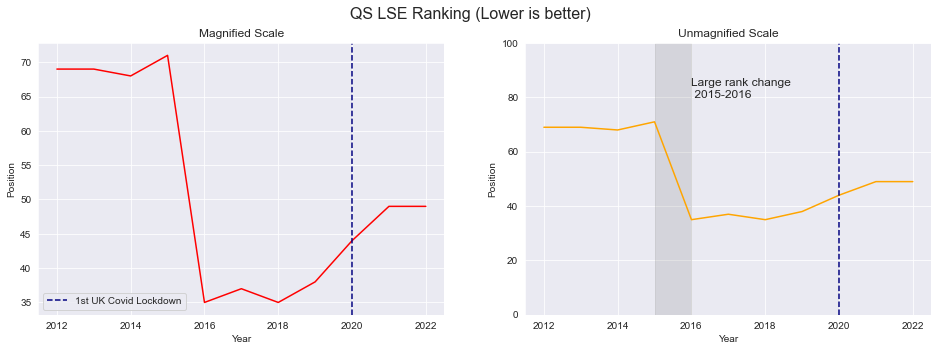

In [96]:
#visualising ranking change for QS LSE Rankings
sns.set_style('darkgrid') 
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('QS LSE Ranking (Lower is better)', fontsize = 16)
ax[0].plot(all_ranks['Year'], all_ranks['QS Ranking'], color = 'red')
ax[0].set(xlabel='Year', ylabel='Position', title='Magnified Scale')
ax[0].axvline(x= 2020, color='navy', linestyle='--', label = "1st UK Covid Lockdown")
ax[1].plot(all_ranks['Year'], all_ranks['QS Ranking'], color = 'orange')
ax[1].set(xlabel='Year', ylabel='Position', title='Unmagnified Scale', ylim = [0, 100])
ax[1].axvline(x= 2020, color='navy', linestyle='--', label = "1st UK Covid Lockdown")
ax[1].axvspan(2015,2016, color='grey', alpha=0.2)
ax[1].annotate('Large rank change \n 2015-2016', xy= (2016, 80), fontsize=12);

ax[0].legend();


As shown through the QS Ranking change when calculating the correlation coeffecient, LSE has made improvements in its rank since 2012. There was a large jump in position from 2015 to 2016. However, it has been worsening since 2018 which could reflect a decrease in relative teaching quality from 2018 however an improvement in relative teaching quality since 2012. The change is definetely significant as LSE has moved from 70th position worldwise to 49th, an increase in 21 positions.

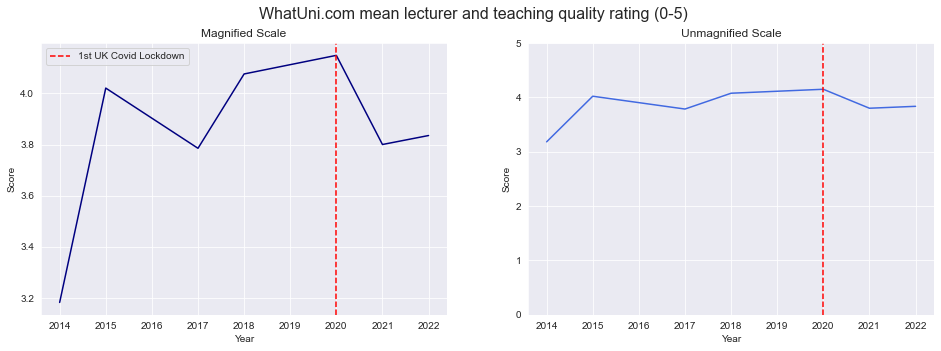

In [67]:
#visualising ranking change for WhatUni.com ratings
fig, ax1 = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('WhatUni.com mean lecturer and teaching quality rating (0-5)', fontsize = 16)
ax1[0].plot(all_ranks['Year'], all_ranks['WhatUni.com Rating'], color = 'navy')
ax1[0].set(xlabel='Year', ylabel='Score', title= "Magnified Scale")
ax1[0].axvline(x= 2020, color='red', linestyle='--', label = "1st UK Covid Lockdown")
ax1[1].plot(all_ranks['Year'], all_ranks['WhatUni.com Rating'], color = 'royalblue')
ax1[1].set(xlabel='Year', ylabel='Score', title= "Unmagnified Scale", ylim = [0, 5])
ax1[1].axvline(x= 2020, color='red', linestyle='--', label = "1st UK Covid Lockdown")
ax1[0].legend();


According to the plot of WhatUni.com's mean review score for lecturers per yer, since 2014, the score has roughly increased but not significantly and the positive correlation doesn't appear to be very strong as indicated by the relatively low correlation coeffecient previously mentioned. This could suggest that LSE has roughly maintained it's teaching quality since 2014, however there is still room for improvement. However, the lack of an upward trend could be due to biases and the fact that 5 is the upper limit for the score, the closer it gets to this upper bound, the more difficult it would b to improve the average score as a large number of 5 point scores would be required. It is also interesting to note that the mean score seem to have fallen from 2020 to 2021 which could be reflective of dissatisfaction with teaching at LSE during online learning due to the pandemic. Additionally, the distribution of scores below shows that accross most years, 4 stars seems to be generally the modal review score and after 2017, there doesn't appear to be any 1 star review scores for the teaching suggesting that perhaps the worst experiences at LSE with teaching may have improved.

Moreover, this data source has a lot of flaws with it which made it difficult to establish a clear trend or look at nuances in the teaching. To discuss this in detail I will refer to plots of the yearly sample size of reviews below.

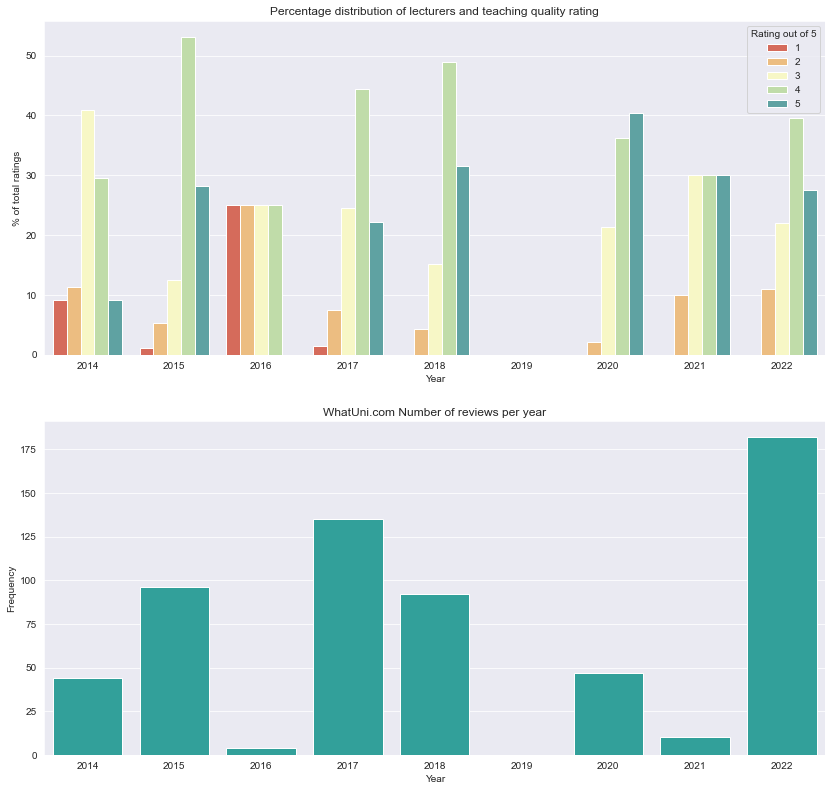

In [68]:
#visualising distribution of WhatUni.com ratings and yearly sample size
df = pivoted_perc.copy()
df.loc[2019] = 0
sns_bar = pd.melt(df.reset_index(), id_vars = 'Year', var_name="Rating out of 5", value_name="% of total ratings")
df2 = pivoted_freq.copy()
df2.loc[2019] = 0

fig, ax2 = plt.subplots(2, 1, figsize = (14, 13.5))
sns.barplot(x = sns_bar['Year'], y = sns_bar['% of total ratings'], hue = sns_bar['Rating out of 5'], palette = 'Spectral', ax = ax2[0])
ax2[0].set(title = "Percentage distribution of lecturers and teaching quality rating")
sns.barplot(x = df2.sum(axis = 1).index, y = df2.sum(axis = 1).values, color = 'lightseagreen', ax = ax2[1])
ax2[1].set(title = "WhatUni.com Number of reviews per year", ylabel = "Frequency");



In [12]:
df2.sum(axis = 1).describe()

count      9.000000
mean      67.777778
std       63.191728
min        0.000000
25%       10.000000
50%       47.000000
75%       96.000000
max      182.000000
dtype: float64

Firstly, the data from reviews does not have a representative sample year on year as the size was very large with 2022 and 2017 in comparison to other years as shown in the number of reviews per year plot. The standard deviation is 63.19 which is very large in comparison to frequency of reviews for most years. This is evident when comparing years such as 2016 to 2022 in which there is large variation in the review sample size making the sampling fluctuation exaggerated. 

Moreover, the data has a lot of missing values from 2012-2022. The year 2019 has no reviews at all. I removed the year 2013 as it only had a few reviews which were all 5 stars and this is likely when the website was made which is why there were very few reviews for the year. While I used linear interpolate to deal with this, this may introduce some bias to the data and fail to capture the actual trend which makes it seem as though the average rating has been stabley increasing over the few years. Another issue is that anyone could have left a rating on the website, there is no verification such as on the NSS website in which you are required to enter your university e-mail and answer a few questions which could potentially distort the dataset. Another source of error in the dataset could also be to human cognitive bias, individuals who have had a bad experience are more likely to have left a bad review therefore, there may be a higher number of poor reviews for teaching than there actually were.

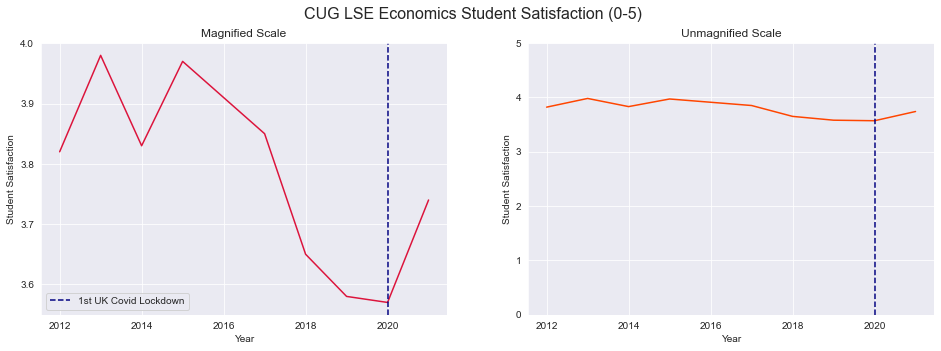

In [69]:
#visualising ranking change for CUG LSE Economics Student Satisfaction
fig, ax3 = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('CUG LSE Economics Student Satisfaction (0-5)', fontsize = 16)
ax3[0].plot(all_ranks['Year'], all_ranks['CUG Economics Student Satisfaction'], color = 'crimson')
ax3[0].set(xlabel='Year', ylabel='Student Satisfaction', title='Magnified Scale')
ax3[0].axvline(x= 2020, color='navy', linestyle='--', label = "1st UK Covid Lockdown")
ax3[1].plot(all_ranks['Year'], all_ranks['CUG Economics Student Satisfaction'], color = 'orangered')
ax3[1].set(xlabel='Year', ylabel='Student Satisfaction', title='Unmagnified Scale', ylim = [0, 5])
ax3[1].axvline(x= 2020, color='navy', linestyle='--', label = "1st UK Covid Lockdown")
ax3[0].legend();

The graph for the evolution of student satisfaction for economics shows a similar story to that of the correlation co-effecient, student satisfaction has been declining since 2015. Regardless, it appears to be making an improvement in the year 2021 as it has increased. This appears to be countrer intuitive as the satisfaction from 2019 to 2020 decreased slightly and increased from 2020 to 2021 which were the COVID years and since there was online teaching it would've been expected for students to have an inferior experience. This suggests that LSE's online teaching methods may have actually been quite effective. Overall however it implies that teaching quality may have fallen since 2012

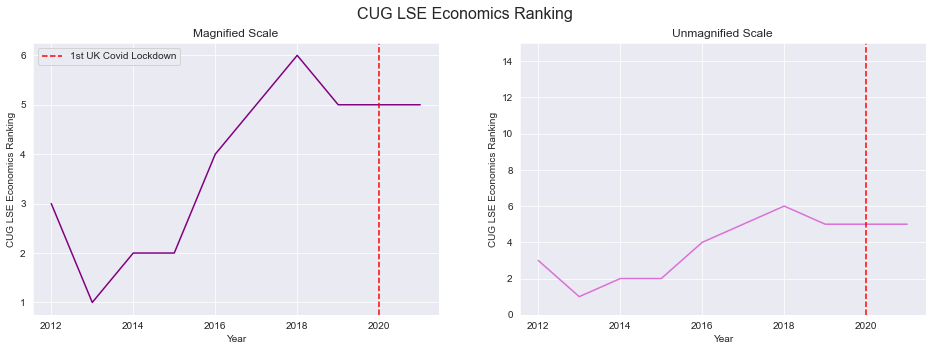

In [77]:
#visualising ranking change for CUG LSE Economics Ranking
fig, ax4 = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('CUG LSE Economics Ranking', fontsize = 16)
ax4[0].plot(all_ranks['Year'], all_ranks['CUG Economics Ranking'], color = "purple")
ax4[0].set(xlabel='Year', ylabel='CUG LSE Economics Ranking', title='Magnified Scale')
ax4[0].axvline(x= 2020, color='red', linestyle='--', label = "1st UK Covid Lockdown")
ax4[1].plot(all_ranks['Year'], all_ranks['CUG Economics Ranking'], color = "orchid")
ax4[1].set(xlabel='Year', ylabel='CUG LSE Economics Ranking', title='Unmagnified Scale',  ylim = [0, 15])
ax4[1].axvline(x= 2020, color='red', linestyle='--', label = "1st UK Covid Lockdown")
ax4[0].legend();

Similarly to student satisfaction, the ranking for Economics at lse has been falling as it started at 3 in 2012 but is now at 6th position but the net movement has been 3 positions. While it does show that relative teaching may have declined, it could be inconclusive as the movement isn't significant and moreover, there are other factors at play as well which could have caused the continual fall in the rankings.

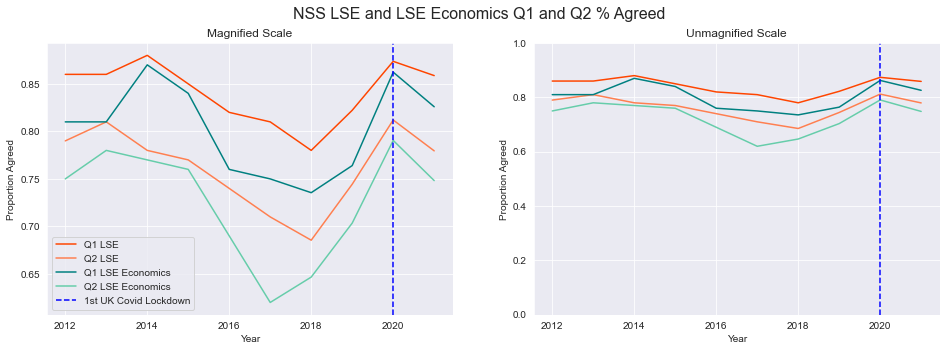

In [81]:
#visualising %agreed for NSS Q1 and Q2
fig, ax5 = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('NSS LSE and LSE Economics Q1 and Q2 % Agreed', fontsize = 16)
ax5[0].plot(all_ranks['Year'], all_ranks['NSS Q1 LSE'], label = 'Q1 LSE', color = 'orangered')
ax5[0].plot(all_ranks['Year'], all_ranks['NSS Q2 LSE'], label = 'Q2 LSE', color = 'coral')
ax5[0].plot(all_ranks['Year'], all_ranks['NSS Q1 LSE Economics'], label = 'Q1 LSE Economics', color = 'teal')
ax5[0].plot(all_ranks['Year'], all_ranks['NSS Q2 LSE Economics'], label = 'Q2 LSE Economics', color = 'mediumaquamarine')
ax5[0].axvline(x= 2020, color='blue', linestyle='--', label = "1st UK Covid Lockdown")
ax5[0].set(xlabel='Year', ylabel='Proportion Agreed', title="Magnified Scale");
ax5[0].legend()
ax5[1].plot(all_ranks['Year'], all_ranks['NSS Q1 LSE'], label = 'Q1 LSE', color = 'orangered')
ax5[1].plot(all_ranks['Year'], all_ranks['NSS Q2 LSE'], label = 'Q2 LSE', color = 'coral')
ax5[1].plot(all_ranks['Year'], all_ranks['NSS Q1 LSE Economics'], label = 'Q1 LSE Economics', color = 'teal')
ax5[1].plot(all_ranks['Year'], all_ranks['NSS Q2 LSE Economics'], label = 'Q2 LSE Economics', color = 'mediumaquamarine')
ax5[1].set(xlabel='Year', ylabel='Proportion Agreed', title="Unmagnified Scale", ylim = [0, 1])
ax5[1].axvline(x= 2020, color='blue', linestyle='--', label = "1st UK Covid Lockdown");


A reminder that Q1 is that **Staff are good at explaining things** and Q2 is **Staff have made the subject interesting**.

Interestingly from the NSS plot we can see that for both Q1 and Q2, LSE Economics has a generally lower proportion that agree with each question. This suggests that the average teaching quality for all degrees at LSE is higher than the the teaching quality in the department of economics as per the student responses which is an interesting finding. Moreover, for both LSE and LSE economics, the trend line has moved in relatively the same direction. However, it appears that teaching quality has fallen since 2012 to 2017 but risen in the years that led up to it finally catching up to the 2012 level. It is also interesting to note that due to covid, the survey in 2021 fell from 2020 which is to be expected as no inperson teaching was possible due to the pandemic. If not for COVID, it could be plausabile that the percentage agreed could have continued to increase beyond 2012 levels. However, the net change seems to not be significant and the changes in the percentage agreed could have been due to sampling fluctation and not be significant enough to label as an improvement in teaching quality or otherwise.

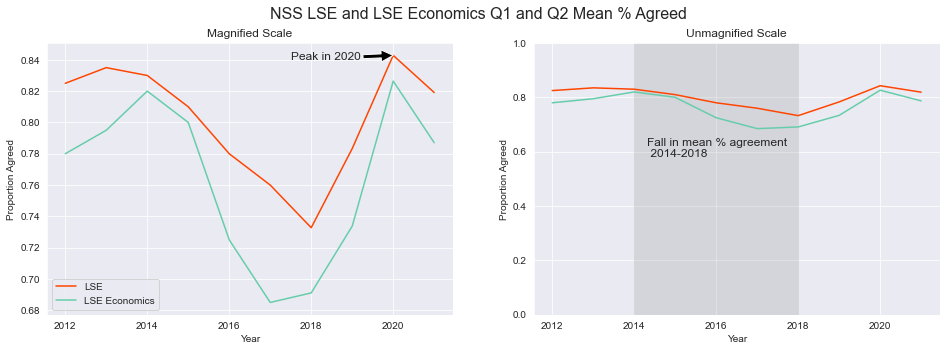

In [92]:
#visualising mean % agreed for NSS Q1 and Q2
fig, ax6 = plt.subplots(1, 2, figsize = (16, 5))
fig.suptitle('NSS LSE and LSE Economics Q1 and Q2 Mean % Agreed', fontsize = 16)
ax6[0].plot(all_ranks['Year'], all_ranks['NSS Mean Q1 and Q2 LSE'], label = 'LSE', color = 'orangered')
ax6[0].plot(all_ranks['Year'], all_ranks['NSS Mean Q1 and Q2 LSE Economics'], label = 'LSE Economics', color = 'mediumaquamarine')
ax6[0].set(xlabel='Year', ylabel='Proportion Agreed', title='Magnified Scale')
ax6[0].annotate('Peak in 2020', xytext=(2017.5, 0.84), fontsize=12, xy=(2020, 0.84285), arrowprops=dict(facecolor='black', shrink=0.001));
ax6[0].legend()
ax6[1].plot(all_ranks['Year'], all_ranks['NSS Mean Q1 and Q2 LSE'], label = 'LSE', color = 'orangered')
ax6[1].plot(all_ranks['Year'], all_ranks['NSS Mean Q1 and Q2 LSE Economics'], label = 'LSE Economics', color = 'mediumaquamarine')
ax6[1].set(xlabel='Year', ylabel='Proportion Agreed', title='Unmagnified Scale', ylim = [0, 1])
ax6[1].axvspan(2014,2018, color='grey', alpha=0.2)
ax6[1].annotate('Fall in mean % agreement \n 2014-2018', xy= (2014.3, 0.58), fontsize=12);


The plot for the mean % agreed for LSE and LSE economics further re-inforces the points stated previously. Moreover, this also shows that the peak was reached in 2020 and was potentially on its way to improve until it was disrupted by COVID in 2020 due to lockdowns. This graphic also illustrates the fall from 2014 to 2018 and subsequent improvements in % agreement.

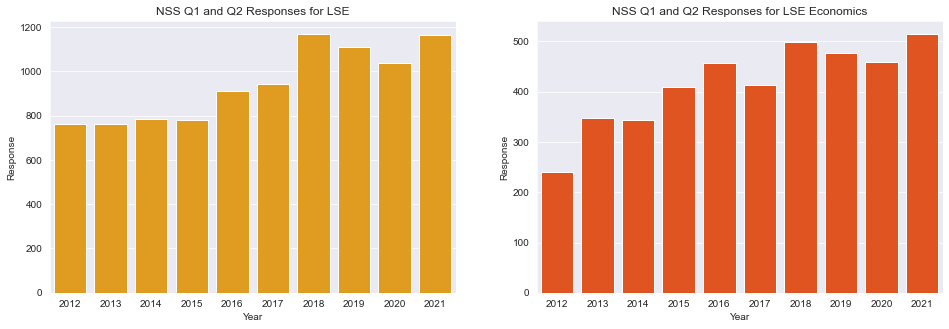

In [16]:
#visualising responses for NSS Q1 and Q2
fig, axes = plt.subplots(1, 2, figsize = (16, 5))
sns.barplot(x = lse_q1['Year'], y = lse_q1['Response'], color = 'orange', ax = axes[0])
sns.barplot(x = lse_econ_q1['Year'], y = lse_econ_q1['Response'], color = 'orangered', ax = axes[1]);
axes[0].set_title("NSS Q1 and Q2 Responses for LSE")
axes[1].set_title("NSS Q1 and Q2 Responses for LSE Economics");

In [17]:
print(lse_q1['Response'].describe())
print(lse_econ_q1['Response'].describe())

count      10.000000
mean      941.500000
std       167.864529
min       760.000000
25%       781.500000
50%       928.000000
75%      1090.250000
max      1168.000000
Name: Response, dtype: float64
count     10.000000
mean     416.500000
std       84.799437
min      241.000000
25%      362.750000
50%      436.000000
75%      472.750000
max      515.000000
Name: Response, dtype: float64


As for the change in sample size for response to the NSS questions, the plots above show that it has not been consistent through the years and has been generally increasing. However, the variation is still better than the WhatUni.com reviews and is more consistent as seen by the standard deviation values for LSE and LSE economics are 167.86 and 84.79 respectively. This suggests that the NSS data is more reliable in its results.

# Conclusion

Overall through our analysis we saw that from 2012, there doesn't seem to a clear conclusion that can be drawn from the data extracted as it does conflict one another. This lack of consensus could be attributed to problems in the data collected such as the methodology or the validity as well as the general sample size. 


### Teaching in the department of Economics
#### CUG Data
CUG Data suggests that teaching in the department of Economics at LSE has actually become worse due to a fall in its ranking year on year as well as student satisfaction. 

#### NSS Data
The NSS Data is perhaps the most methodologically consistent dataset used in this report. While response sample sizes have been increasing, it has not been by a significant margin. Teaching quality at LSE Economcs seemed to have dropped from 2012 to 2017, however has been increasing since back to 2012 levels, therefore, it doesn't seem as though much improvment has been made. 

#### Overall
The conclusion is not clear and falls between declining quality in teaching and improvements in quality of teaching despite a decline from 2012 to 2012 levels. 

### Teaching in LSE
#### QS Rankings
Conclusion from the QS Ranking data is quite clear, LSE has improved since 2012 as a university indicating better teaching on a global level however, within the past 5 years, it appears to have fallen slightly in the rankings.

#### What Uni.com Data
For the review data, the average teaching rating seems to have increased since 2012 suggesting an improvement in teaching quality. However, there are certain problems with the data that could undermine this which were previously discussed. 

#### NSS Data
The trend for teaching at LSE is also extremely similar for teaching in the department of Economics, there appears to have been an initial decline in teaching quality and then subsequent improvment. However, the improvement could have been disrupted by COVID lockdowns as the % agreed fell in 2021.

#### Overall
Overall, while the results are still unclear, it appears that teaching across LSE has been slightly improving since 2012 or has been maintained since 2012.

### Other findings
It appears according to NSS data that generally teaching quality is better accross all LSE departments rather than the department of economics. Moreover, COVID has had an impact on many of the metrics causing an expected fall in LSE's teaching quality, but interestingly for some metrics such as the CUG Economics Student Satisfaction, satisfaction increased during the covid year.

### General comments/Data Limitations
For this section, I will highlight some general comments about the data as well as limitations.
Some problems were:
- University ranking websites have different criteria. 
- LSE May have improved teaching in ranking but other universities might have improved more, so relatively worse but still better than before
- Satisfaction also depends on reference points (anchoring bias), if students expect extremely high level teaching from an instituion because of their reputation, they may be left dissapointed while on the other hand, if students have lower expectations of teaching quality from a university that has a worse reputation, they may feel more satisifed if it surpasses that even if it might not be as good as the instution with the high reputation.
- Polarisation of opinion as students who choose to leave a review are more likely to have stronger opinions on the performance of professors
- There may be selection bias as only people who know about these websites may post their reviews, they may have had access to different resources compared to other LSE students as they knew about the website through research beforehand therefore the reviews may not be representative of the population 
- Could not use question 3 and 4 on the NSS as it changed in 2017 and the framing of it could have affected the responses. 
- On the NSS, perhaps 2 questions are not enough to truly analyse a complex concept such as teaching quality. 

### Extensions
For review scores, an extension could be done to compare it between different websites and try to identify if a similar consensus exists. This would require more webscraping knowledge to deal with interactive website layouts.  

Moreover, I could also scrape similar data for other universities that compete with LSE such as UCL, KCL and Warwick and try to find whether one university has been improving better over the other in terms of teaching quality. This would also help find relative teaching improvement or decline.

Another possible extension would be to directly survey LSE students on the LSE campus about teaching to eliminate some selection bias, however this would require a lot of human effort and would require years of data collection to try to establish how it has been changing. 

Lastly, a long term study of this could prove beneficial with data collection over the next few years.